Iteration 1: Error = 0.3713182072876001
Iteration 2: Error = 1.0353331726439136e-08
Converged!


<bound method Axes.legend of <AxesSubplot:title={'center':'Quantum Energy Levels'}, xlabel='Index', ylabel='Energy (eV)'>>

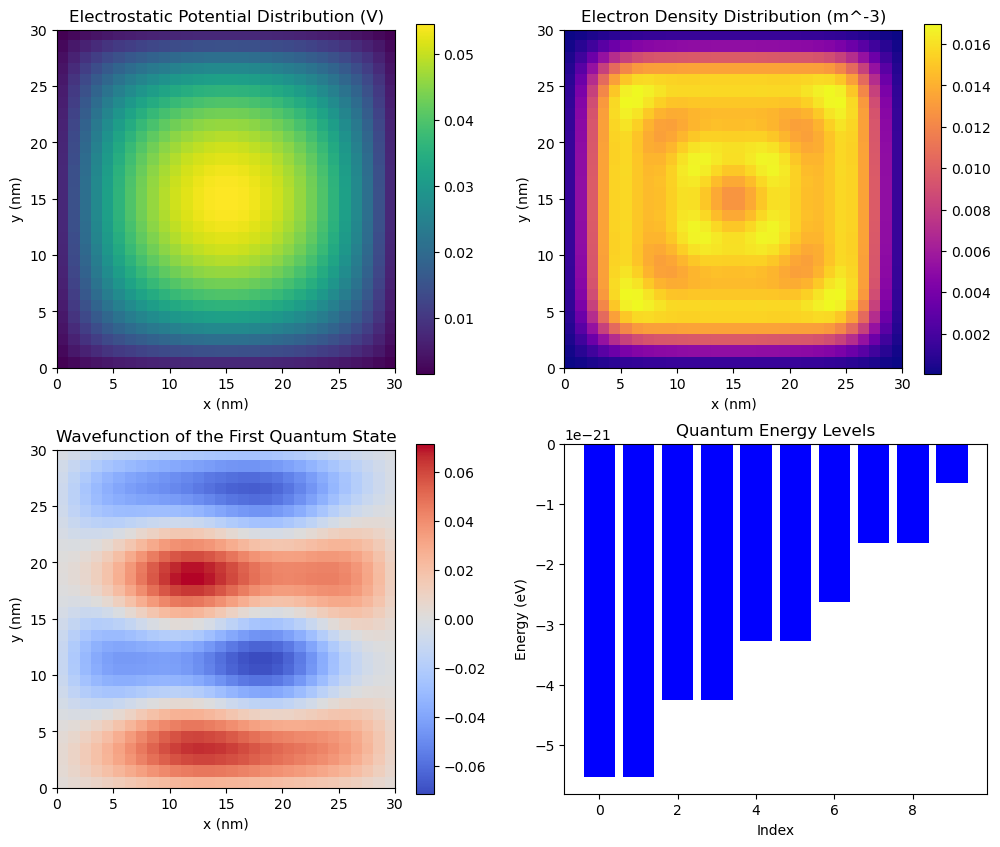

In [1]:
import matplotlib.pyplot as plt
from Solver import * 

#simulation parameter
Nx, Ny = 30, 30  # 2D  
grid_shape = (Nx, Ny)
dx = dy = 1e-9   
#input parameter
epsilon = 11.7 * const.epsilon_0   
effective_mass = 0.19   
temperature = 300   
fermi_level = 1.5  
doping_profile = np.ones(grid_shape) * 5e23 

#Solver
solver2D = SchrodingerPoissonSolver2D(grid_shape, epsilon, effective_mass, doping_profile, temperature, fermi_level)
phi, energy_levels, wavefunctions, n_final = solver2D.solve()

#visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (1)
ax1 = axes[0, 0]
im1 = ax1.imshow(phi, cmap="viridis", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax1.set_title("Electrostatic Potential Distribution (V)")
ax1.set_xlabel("x (nm)")
ax1.set_ylabel("y (nm)")
fig.colorbar(im1, ax=ax1)

# (2)  
ax2 = axes[0, 1]
im2 = ax2.imshow(n_final, cmap="plasma", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax2.set_title("Electron Density Distribution (m^-3)")
ax2.set_xlabel("x (nm)")
ax2.set_ylabel("y (nm)")
fig.colorbar(im2, ax=ax2)

# (3)  
ax3 = axes[1, 0]
im3 = ax3.imshow(wavefunctions[:, :, 0], cmap="coolwarm", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax3.set_title("Wavefunction of the First Quantum State")
ax3.set_xlabel("x (nm)")
ax3.set_ylabel("y (nm)")
fig.colorbar(im3, ax=ax3)

# (4)  
ax4 = axes[1, 1]
ax4.bar(range(len(energy_levels)), energy_levels, color="blue", label="Energy Levels (eV)")
ax4.set_title("Quantum Energy Levels")
ax4.set_xlabel("Index")
ax4.set_ylabel("Energy (eV)")
ax4.legend
